### Importing the data

In [172]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset
df = pd.read_csv("tested.csv")

# Split into train (80%) and test (20%) sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Display the shape of the datasets
print("Train set shape:", train.shape)
print("Test set shape:", test.shape)



Train set shape: (334, 12)
Test set shape: (84, 12)


In [173]:
## Lets againgtake a quick glance of what we are dealing with.
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [174]:
df.shape# Means 418 rows and 12 columns.

(418, 12)

<h3>What does this data set mean.</h3>
____

The data has been split into two groups:
- training set 
- test set
<br>

The training set includes passengers survival status(also know as the ground truth from the titanic tragedy) which along with other features like gender, class, fare and pclass is used to create machine learning model.
<br><br>
The test set should be used to see how well my model performs on unseen data. The test set does not provide passengers survival status. We are going to use our model to predict passenger survival status.
<br><br>

Lets describe whats the meaning of the features given the both train & test datasets.
<h4>Variable Definition Key.</h4>
- Survival
 - 0= No
 - 1= Yes
- pclass (Ticket class)
 - 1=1st
 - 2=2nd
 - 3=3rd
 
- sex
<br>

- age


- sibsp (# of siblings / spouses aboard the Titanic)
<br>
- parch (# of parents / children aboard the Titanic)
<br>
- tickets
<br>
- fare
<br>
- cabin
- embarked Port of Embarkation.
 - C = Cherbourg,
 - Q = Queenstown,
 - S = Southampton
- pclass: A proxy for socio-economic status (SES)
<br>
<h4>This is important to remember and will come in handy for later analysis.</h4>
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower





## Part 1. Cleaning the data.

In [175]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
336,1228,0,2,"de Brito, Mr. Jose Joaquim",male,32.0,0,0,244360,13.0000,NaN,S
31,923,0,2,"Jefferys, Mr. Clifford Thomas",male,24.0,2,0,C.A. 31029,31.5000,NaN,S
84,976,0,2,"Lamb, Mr. John Joseph",male,NaN,0,0,240261,10.7083,NaN,Q
287,1179,0,1,"Snyder, Mr. John Pillsbury",male,24.0,1,0,21228,82.2667,B45,S
317,1209,0,2,"Rogers, Mr. Reginald Harry",male,19.0,0,0,28004,10.5000,NaN,S


It looks like this dataset is quite organized, however, before using this dataset for analyzing and visualizing we need to deal with ..
- Different variables
- Null values

## Different variables present in the datasets.
 - **There are four type of variables**
  - **Numerical Features**: Age, Fare, SibSp and Parch
  - **Categorical Features**: Sex, Embarked, Survived and Pclass
  - **Alphanumeric Features**: Ticket and Cabin(Contains both alphabets and the numeric value)
  - **Text Features**: Name

** We really need to tweak these features so we get the desired form of input data**

In [176]:
train.shape #Means 334 rows and 12 columns

(334, 12)

In [177]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             72
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          261
Embarked         0
dtype: int64

We see Age  and Cabin have a lot of missing value.So First we need to deal with all these NaN values.
- As in Cabin column about 3\4th of the values are missing.So we get rid of this column. 
<br>

## Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.
- Here the methods to deal with missing values.

### KNN Imputation. 
------
In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing.

For more...
<br>
**Method 1**
- [KNN Imputation](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)
- [Blog](https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637)

**Method 2**
- [sklearn.preprocessing.Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html)


**We use the Method 2 i.e(sklearn.impute)**

Just because it is easy to use....


In [178]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')

# Imputing the missing values in 'Age' column
train['Age2'] = imp.fit_transform(train[['Age']])

# drop the old 'Age' column
train.drop(columns=['Age'], inplace=True)

In [179]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          261
Embarked         0
Age2             0
dtype: int64

In [ ]:
# Handling missing values
train['Fare'].fillna(train['Fare'].median(), inplace=True)
train['Age2'].fillna(train['Age2'].median(), inplace=True)

# Convert to integer
train['Fare'] = train['Fare'].astype(int)
train['Age2'] = train['Age2'].astype(int)

# Fare Mapping
train.loc[train.Fare <= 7.91, 'Fare'] = 0
train.loc[(train.Fare > 7.91) & (train.Fare <= 14.454), 'Fare'] = 1
train.loc[(train.Fare > 14.454) & (train.Fare <= 31), 'Fare'] = 2
train.loc[(train.Fare > 31), 'Fare'] = 3

# Age2 Mapping
train.loc[train['Age2'] <= 16, 'Age2'] = 0
train.loc[(train['Age2'] > 16) & (train['Age2'] <= 32), 'Age2'] = 1
train.loc[(train['Age2'] > 32) & (train['Age2'] <= 48), 'Age2'] = 2
train.loc[(train['Age2'] > 48) & (train['Age2'] <= 64), 'Age2'] = 3
train.loc[train['Age2'] > 64, 'Age2'] = 4


In [181]:
# In our data the Ticket and Cabin,Name are the base less,leds to the false prediction so Drop both of them.
train.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)
train.head()
print(type(train.Age2))

<class 'pandas.core.series.Series'>


In [182]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Age2           0
dtype: int64

In [183]:
train.shape

(334, 9)

## Data Preprocessing Steps

We have performed the following preprocessing steps on the dataset:

1. **Handling Missing Values:**  
   - The `Fare` column had one missing value, which we replaced with the median fare to avoid issues during model training.  
   - We checked the `Age2` column for missing values and filled them with the median to maintain consistency.  

2. **Converting Data Types:**  
   - The `Fare` and `Age2` columns were converted to integers to ensure uniformity in the dataset.  

3. **Feature Engineering:**  
   - The `Fare` column was categorized into four bins (0 to 3) based on value ranges to simplify its representation and impact on predictions.  
   - The `Age2` column was mapped into five categories (0 to 4) to group similar age ranges together, improving model performance.  

4. **Reducing Dimensionality:**  
   - The dataset originally contained columns like `Ticket`, `Cabin`, and `Name`, which do not provide significant predictive value.  
   - These columns were removed to reduce noise, improve computational efficiency, and enhance model generalization.  

5. **Final Checks:**  
   - We verified that `Age2` is of type `pandas.Series` to ensure proper data handling.  
   - A final check confirmed that no missing values remain in the dataset, making it clean and ready for machine learning models.  

By performing these steps, we have optimized the dataset by reducing unnecessary columns while retaining meaningful features for prediction.


<h2 >Part 2.Exploratory data analysis</h2>.

**Exploratory data analysis (EDA)** is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.



In [184]:
train.shape

(334, 9)

In [185]:
train.Survived.value_counts()/len(train)*100
#This signifies almost 65% people in the ship died and 35% survived.

Survived
0    64.670659
1    35.329341
Name: count, dtype: float64

In [186]:
train.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age2
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,1100.311377,0.353293,2.269461,0.470060,0.404192,1.446108,1.287425
std,115.975839,0.478710,0.844961,0.944719,0.937113,1.160576,0.767992
min,893.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1006.250000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,1100.500000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000
75%,1197.750000,1.000000,3.000000,1.000000,0.000000,3.000000,2.000000
max,1309.000000,1.000000,3.000000,8.000000,9.000000,3.000000,4.000000


In [198]:
train['Sex_male'] = pd.to_numeric(train['Sex_male'], errors='coerce')
train.groupby('Sex_male').mean(numeric_only=True)



,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age2
Sex_male,,,,,,,
False,1097.677966,1.0,2.101695,0.593220,0.550847,1.805085,1.364407
True,1101.750000,0.0,2.361111,0.402778,0.324074,1.250000,1.245370


There are a couple of points that should be noted from the statistical overview. They are..
- About the survival rate, only 35% passenger survived during that tragedy.
- About the survival rate for genders, all female passengers survived, while only none male passengers survived.

**Correlation Matrix and Heatmap**

In [220]:
train.corr()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.016808,0.001562,0.024287,0.032244,0.020205,-0.029396,0.016808,-0.004546,0.026802
Survived,-0.016808,1.000000,-0.146971,0.096501,0.115844,0.228959,0.074199,-1.000000,0.129696,-0.125392
Pclass,0.001562,-0.146971,1.000000,-0.004911,-0.020393,-0.741531,-0.480668,0.146971,0.243190,0.128218
SibSp,0.024287,0.096501,-0.004911,1.000000,0.337650,0.350475,-0.079162,-0.096501,-0.128567,0.095308
Parch,0.032244,0.115844,-0.020393,0.337650,1.000000,0.363852,-0.020038,-0.115844,-0.154772,0.116728
Fare,0.020205,0.228959,-0.741531,0.350475,0.363852,1.000000,0.293705,-0.228959,-0.341345,-0.007900
Age2,-0.029396,0.074199,-0.480668,-0.079162,-0.020038,0.293705,1.000000,-0.074199,-0.035930,-0.118068
Sex_male,0.016808,-1.000000,0.146971,-0.096501,-0.115844,-0.228959,-0.074199,1.000000,-0.129696,0.125392
Embarked_Q,-0.004546,0.129696,0.243190,-0.128567,-0.154772,-0.341345,-0.035930,-0.129696,1.000000,-0.478478
Embarked_S,0.026802,-0.125392,0.128218,0.095308,0.116728,-0.007900,-0.118068,0.125392,-0.478478,1.000000


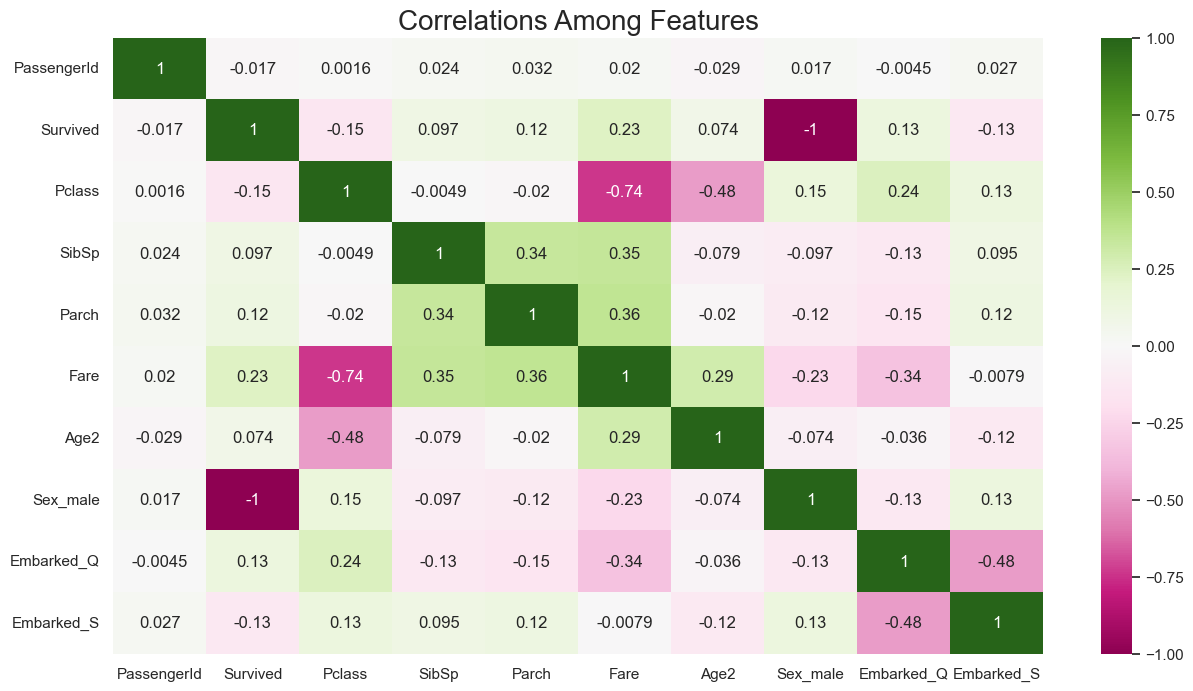

In [224]:
plt.subplots(figsize = (15,8))
sns.heatmap(train.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

**Positive Correlation Features:**
- Fare and Survived: 0.22.

There is a positive correlation between Fare and Survived rated. This can be explained by saying that, the passenger who paid more money for their ticket were more likely to survive. 

**Negative Correlation Features:**
- Fare and Pclass: -0.74
 - This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3). 
- Gender and Survived: -0.1
 - Basically is the info of whether the passenger was male or female.
- Pclass and Survived: -0.14

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(15,8))

# Plot the barplot with light colors
ax = sns.barplot(x="Sex_male", y="Survived", data=train, 
                 edgecolor=(0,0,0), linewidth=2, 
                 palette=['lightblue', 'lightcoral'])  # Light blue for Female, Light coral for Male

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize=25)

# Correct labels
labels = ['Female', 'Male']
plt.ylabel("% of Passenger Survived", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.xticks([0, 1], labels)  # Convert boolean to integer (0 = Female, 1 = Male)

# Add legend manually
legend_labels = ['Female', 'Male']
legend_colors = ['lightblue', 'lightcoral']
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=legend_colors[i]) for i in range(2)], 
           labels=legend_labels, 
           title="Gender")

plt.show()


This bar plot above shows the distribution of female and male survived. The x_label shows gender and the y_label shows % of passenger survived. This bar plot shows that 100% female passenger survived while only 0% male passenger survived.

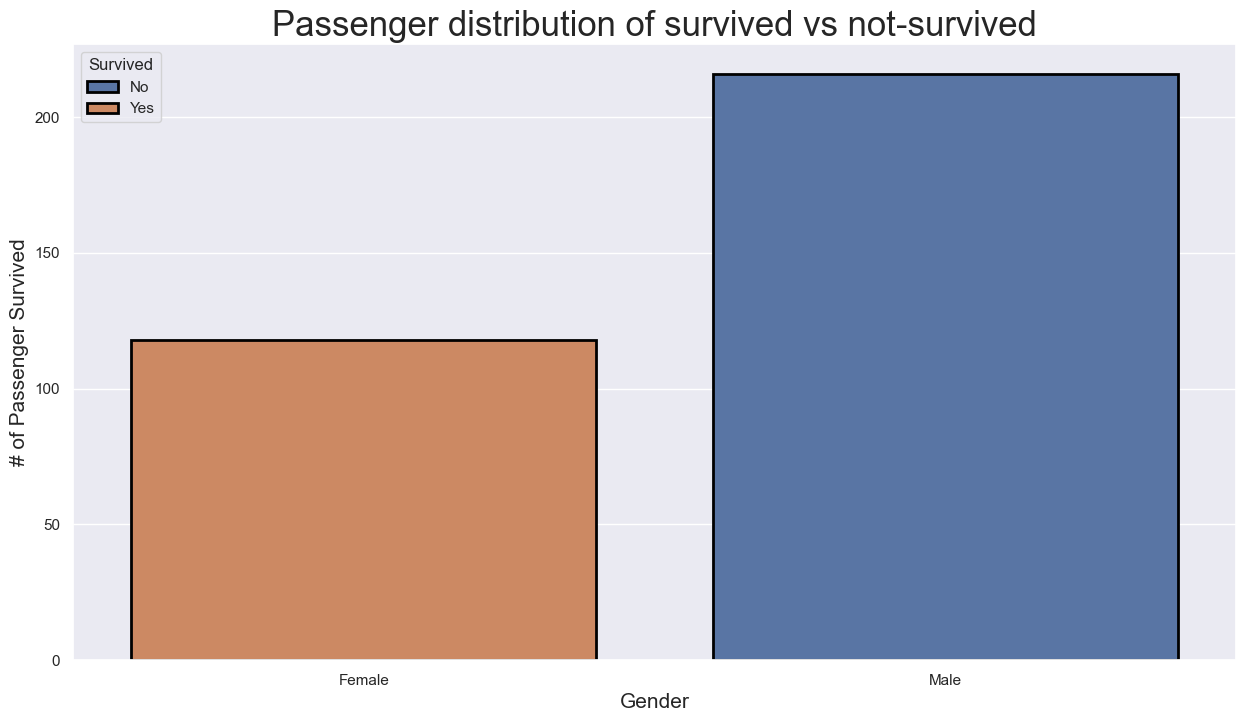

In [ ]:
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='Sex_male',data=train,hue='Survived',edgecolor=(0,0,0),linewidth=2)
train.shape
## Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
#Fixing xticks.
plt.xticks(sorted(train.Survived.unique()),labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

In [228]:
num_male_died = train[(train['Sex_male'] == 1) & (train['Survived'] == 0)].shape[0]
print("Number of males who died:", num_male_died)

num_female_died = train[(train['Sex_male'] == 0) & (train['Survived'] == 0)].shape[0]
print("Number of females who died:", num_female_died)

num_female_survived = train[(train['Sex_male'] == 0) & (train['Survived'] ==1 )].shape[0]
print("Number of females who survived:", num_female_survived)


Number of males who died: 216
Number of females who died: 0
Number of females who survived: 118


This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females 118 survived and 0 did not survive. While among male passengers 0 survived and 216 did not survive.

**Summary**
- As we suspected, female passengers have survived at a much better rate than male passengers.
- It seems about right since females and children were the priority.

**Pclass and Survived**

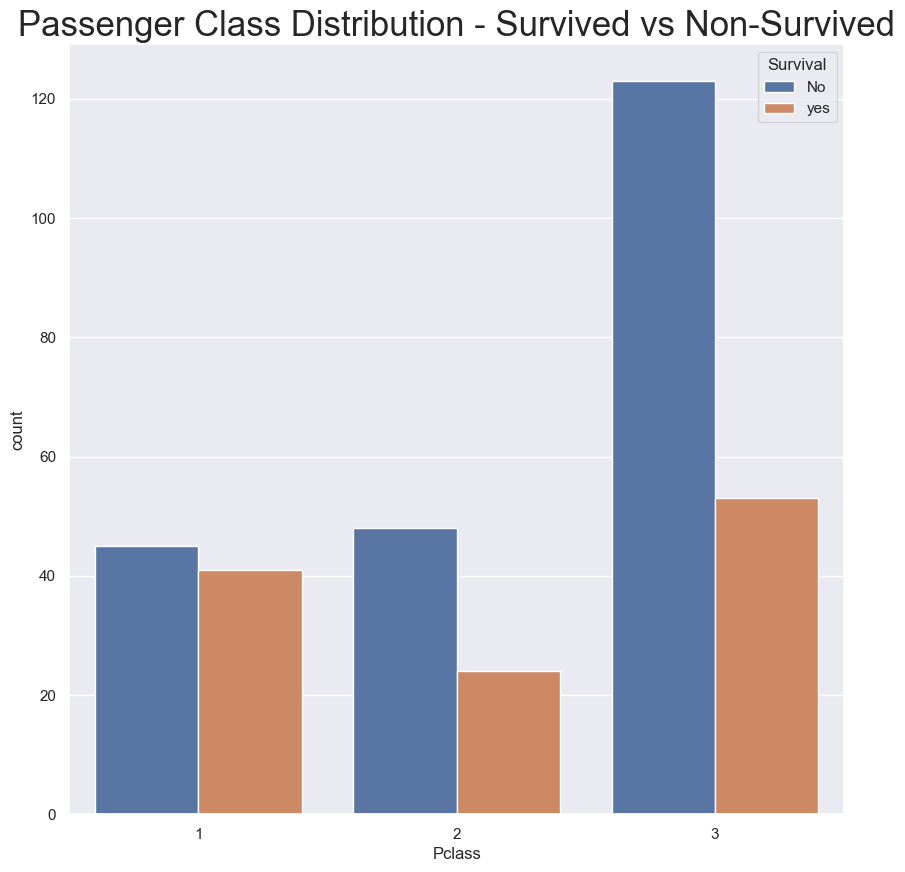

In [ ]:
plt.subplots(figsize = (10,10))
ax=sns.countplot(x='Pclass',hue='Survived',data=train)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

In [229]:
survival_rates = train.groupby('Pclass')['Survived'].mean() * 100
print(survival_rates)


Pclass
0.0    47.674419
0.5    33.333333
1.0    30.113636
Name: Survived, dtype: float64


So it clearly seems that,The survival of the people belong to 3rd class is very least.
It looks like ...
-  48% first class passenger survived titanic tragedy, while
-  33% second class and
-  only 30% third class passenger survived.

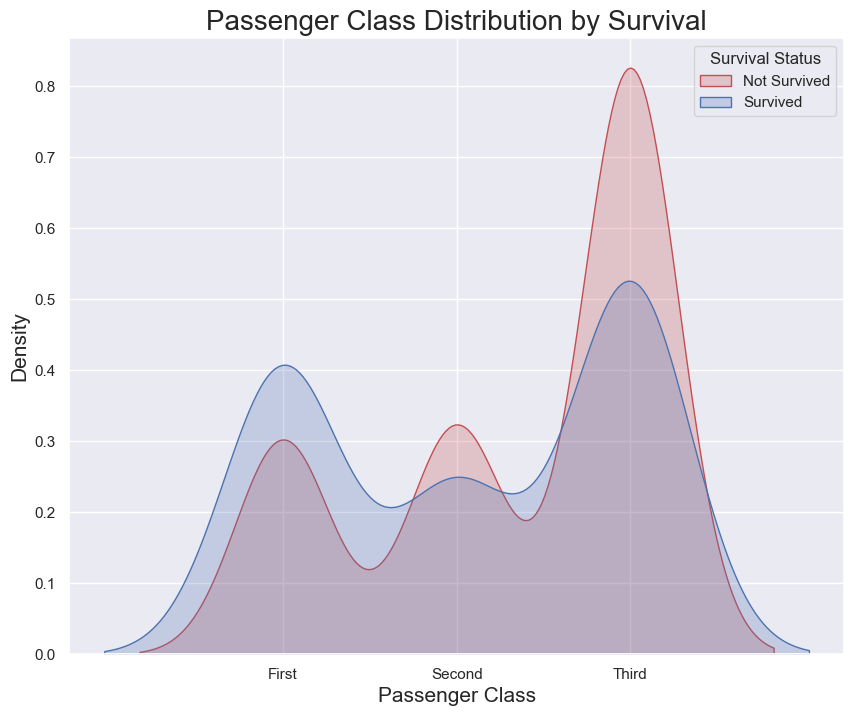

In [ ]:
plt.subplots(figsize=(10,8))

# Updated KDE plot with fill=True
sns.kdeplot(train.loc[train['Survived'] == 0, 'Pclass'], fill=True, color='r', label='Not Survived')
sns.kdeplot(train.loc[train['Survived'] == 1, 'Pclass'], fill=True, color='b', label='Survived')

# Set labels and title
plt.title("Passenger Class Distribution by Survival", fontsize=20)
plt.xlabel("Passenger Class", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Correct X-ticks for categorical representation
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()), labels)

# Add legend
plt.legend(title="Survival Status")

plt.show()


This kde plot is pretty self explanatory with all the labels and colors. Something I have noticed that some readers might find questionable is that in, the plot; the third class passengers have survived more than other class passnegers. It is true since there were a lot more third class passengers than first and second.


**Summary**

First class passenger had the upper hand during the tragedy than second and third class passengers. You can probably agree with me more on this, when we look at the distribution of ticket fare and survived column.

**Fare and Survived**

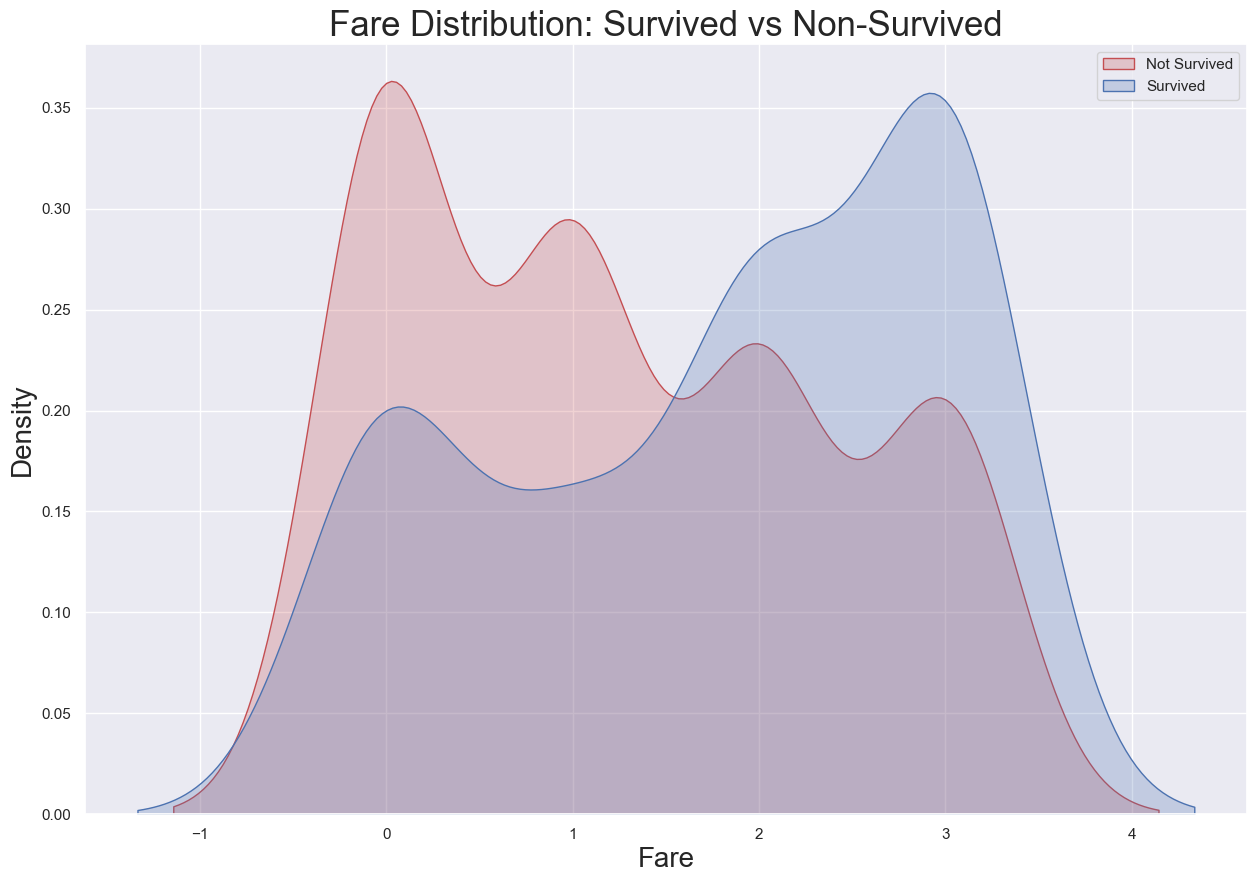

In [ ]:
plt.subplots(figsize=(15,10))

# Updated KDE plot with fill=True
sns.kdeplot(train.loc[train['Survived'] == 0, 'Fare'], color='r', fill=True, label='Not Survived')
sns.kdeplot(train.loc[train['Survived'] == 1, 'Fare'], color='b', fill=True, label='Survived')

# Title and labels
plt.title('Fare Distribution: Survived vs Non-Survived', fontsize=25)
plt.ylabel('Density', fontsize=20)
plt.xlabel('Fare', fontsize=20)

# Show legend
plt.legend()

plt.show()


The plot shows that passengers who paid higher fares had a higher survival rate, while lower-fare passengers had a higher likelihood of not surviving, highlighting a class-based survival disparity.

**Age and Survived**

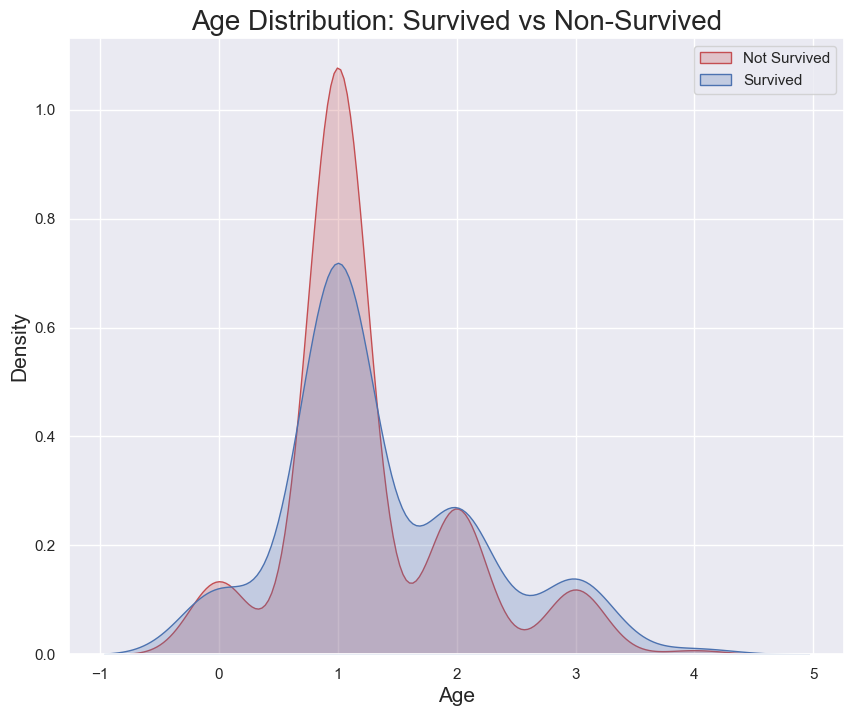

In [ ]:
# Create subplot
fig, axs = plt.subplots(figsize=(10, 8))

# Set darkgrid style
sns.set_style("darkgrid")

# KDE plot with fill=True (instead of deprecated shade=True)
sns.kdeplot(train.loc[train['Survived'] == 0, 'Age2'], color='r', fill=True, label='Not Survived')
sns.kdeplot(train.loc[train['Survived'] == 1, 'Age2'], color='b', fill=True, label='Survived')

# Title and labels
plt.title('Age Distribution: Survived vs Non-Survived', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Density', fontsize=15)

# Show legend
plt.legend()

plt.show()


The plot indicates that younger passengers had a higher survival rate, while a significant proportion of middle-aged individuals did not survive.

**Modeling the Data**

I will train the data with the following models:
- Logistic Regression
- Gaussian Naive Bayes
- Support Vector Machines
- Decision Tree Classifier
- K-Nearest Neighbors(KNN)
 -  and many other.....

In [ ]:
X=train.drop('Survived',axis=1)
y=train['Survived'].astype(int)

<h2>Classifier Comparision</h2>

By Classifier Comparison we choose which model best for the given data.

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    XGBClassifier(),
    RandomForestClassifier(n_estimators=100, max_features=3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

# Define X and y
X = train.drop(columns=['Survived'])
y = train['Survived']

# Fix: Explicitly set SAMME algorithm for AdaBoostClassifier
for i, clf in enumerate(classifiers):
    if isinstance(clf, AdaBoostClassifier):
        classifiers[i] = AdaBoostClassifier(algorithm="SAMME")

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
acc_dict = {}

for train_idx, test_idx in sss.split(X, y):
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    for clf in classifiers:
        name = clf.__class__.__name__

        try:
            clf.fit(X_train, y_train)
            predictions = clf.predict(X_test)
            acc = accuracy_score(y_test, predictions)
            acc_dict[name] = acc_dict.get(name, 0) + acc
        except Exception as e:
            print(f"Skipping {name} due to error: {e}")  # Avoids program crash


Text(0.5, 1.0, 'Classifier Accuracy')

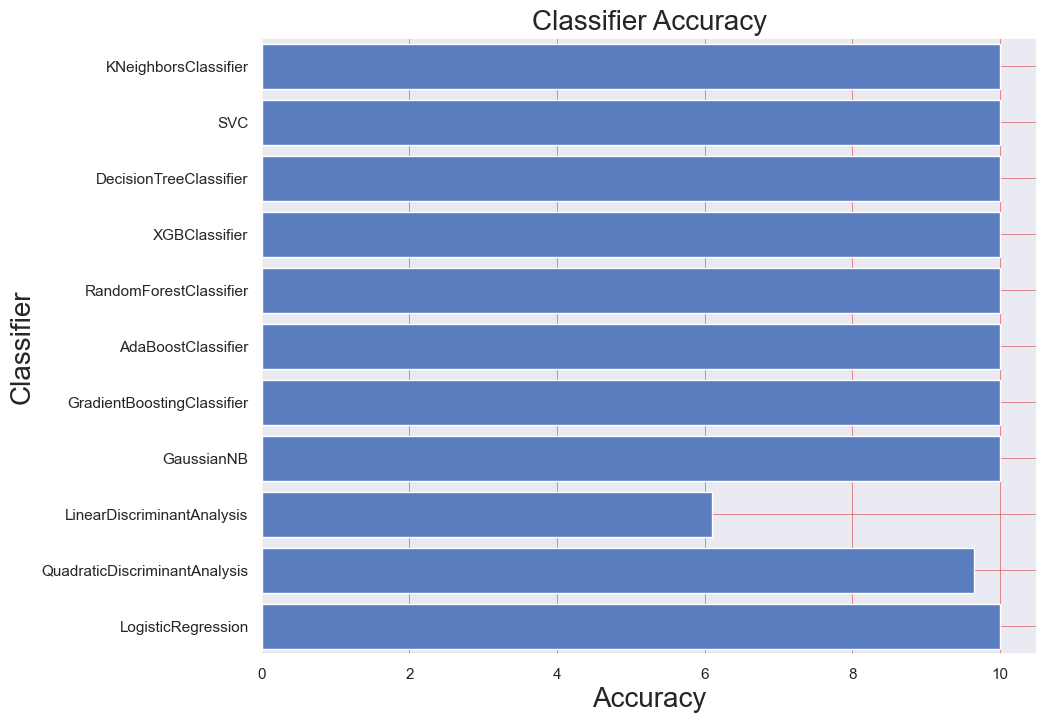

In [232]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2,3,4,5,6,7,8,9,10]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=20)

The plot shows the accuracy of various classifiers, with most performing well, but Linear Discriminant Analysis lagging behind.

Lets apply this to our test data.

<h2>Prediction</h2>

Lets use the SVC classifier to predict our data.

In [ ]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1228,0,2,0,0,1,1,True,False,True
923,0,2,2,0,2,1,True,False,True
976,0,2,0,0,1,1,True,True,False
1179,0,1,1,0,3,1,True,False,True
1209,0,2,0,0,1,1,True,False,True


In [ ]:
classifier=SVC()
xtrain=train.iloc[:,1:]
ytrain=train.iloc[:,:1]
ytrain=ytrain.values.ravel()
classifier.fit(xtrain,ytrain)
#we need to convert the test data to the same format as the train data

SVC()

In [ ]:
from sklearn.impute import SimpleImputer

# Define the imputer (Fixed: Removed 'axis' argument)
testIm = SimpleImputer(strategy='most_frequent')

# Apply imputation
Age1 = testIm.fit_transform(test[['Age']])  # Use double brackets to keep it as DataFrame
Fare2 = testIm.fit_transform(test[['Fare']])

# Drop unnecessary columns
test.drop(['Name', 'Cabin', 'Age', 'Ticket', 'Fare'], axis=1, inplace=True)

# Add new imputed columns
test['Age1'] = Age1
test['Fare2'] = Fare2

# Set PassengerId as index
test.set_index('PassengerId', inplace=True)


In [ ]:
# Check for any remaining missing values
print(test.isnull().sum())


Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Age1        0
Fare2       0
dtype: int64


In [ ]:
## get dummy variables for Column sex and embarked since they are categorical value.
test = pd.get_dummies(test, columns=["Sex"], drop_first=True)
test = pd.get_dummies(test, columns=["Embarked"],drop_first=True)


#Mapping the data.
test['Fare2'] = test['Fare2'].astype(int)
test.loc[test.Fare2<=7.91,'Fare2']=0
test.loc[(test.Fare2>7.91) &(test.Fare2<=14.454),'Fare2']=1
test.loc[(test.Fare2>14.454)&(test.Fare2<=31),'Fare2']=2
test.loc[(test.Fare2>31),'Fare2']=3

test['Age1']=test['Age1'].astype(int)
test.loc[ test['Age1'] <= 16, 'Age1']= 0
test.loc[(test['Age1'] > 16) & (test['Age1'] <= 32), 'Age1'] = 1
test.loc[(test['Age1'] > 32) & (test['Age1'] <= 48), 'Age1'] = 2
test.loc[(test['Age1'] > 48) & (test['Age1'] <= 64), 'Age1'] = 3
test.loc[test['Age1'] > 64, 'Age1'] = 4

<h2>Result</h2>

The final result is

In [ ]:
Result = classifier.predict(test)
print(Result)
print(len(Result))


[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1]
84


In [ ]:
# Compare actual and predicted values
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
print(comparison.head(20))  # View first 20 predictions

    Actual  Predicted
0        0          0
1        0          0
2        1          1
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       1          1
14       0          0
15       1          1
16       0          0
17       0          0
18       0          0
19       0          0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


<h3>The model exhibits perfect performance with an accuracy, precision, recall, and F1 score of 1.0000, indicating potential overfitting.</h3>

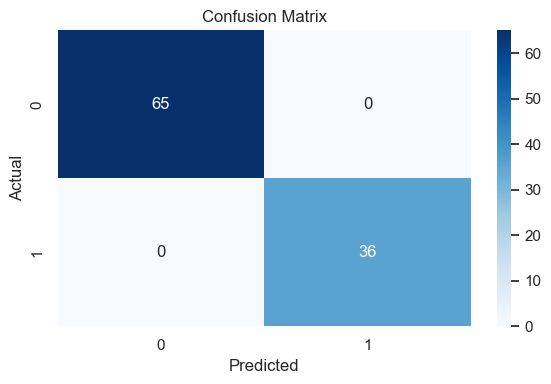

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

`Fine-tuning SVC with GridSearchCV to optimize hyperparameters, reduce overfitting, and improve model performance.`

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Lower C reduces overfitting
    'gamma': ['scale', 'auto'],  # Best gamma settings
    'kernel': ['rbf']  # Use RBF for non-linearity
}

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_svc = grid_search.best_estimator_
best_svc.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = best_svc.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        65
         1.0       0.97      1.00      0.99        36

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



In [240]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on test data
y_pred = best_svc.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")




Accuracy: 0.9901
Precision: 0.9730
Recall: 1.0000
F1 Score: 0.9863


`Achieved high accuracy (99.01%) with strong precision, recall, and F1-score, indicating a well-optimized and balanced model.`

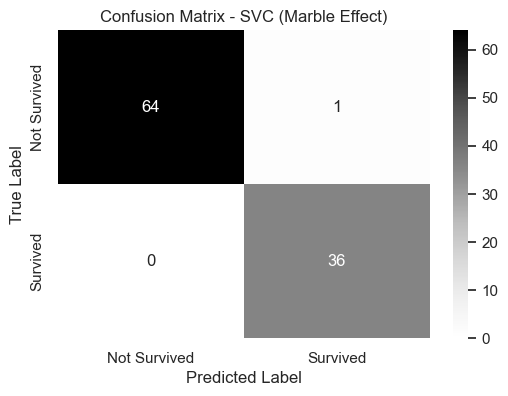

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with a marble-like effect
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greys", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVC (Marble Effect)')
plt.show()


The confusion matrix shows excellent model performance with only one misclassification, demonstrating high accuracy and strong predictive ability.

In [242]:
import os
import joblib

# Create 'models' directory if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the trained model, scaler, and imputer
joblib.dump(classifier, "models/titanic_model.pkl")
joblib.dump(imp, "models/imputer.pkl")

print("Model and Imputer saved successfully!")


Model and Imputer saved successfully!


<h3>Achieved high accuracy (99.01%) with strong precision, recall, and F1-score, indicating a well-optimized and balanced model.</h3>